In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Fraud.csv')

df_info = df.info()
df_head = df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


# Data cleaning including missing values, outliers and multi-collinearity

In [4]:
missing_values = df.isnull().sum()
outliers = df.describe()
correlation_matrix = df.corr()

missing_values, outliers, correlation_matrix

C:\Users\Suchita\AppData\Local\Temp\ipykernel_9348\3184263608.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


(step              0
 type              0
 amount            0
 nameOrig          0
 oldbalanceOrg     0
 newbalanceOrig    0
 nameDest          0
 oldbalanceDest    0
 newbalanceDest    0
 isFraud           0
 isFlaggedFraud    0
 dtype: int64,
                step        amount  oldbalanceOrg  newbalanceOrig  \
 count  6.362620e+06  6.362620e+06   6.362620e+06    6.362620e+06   
 mean   2.433972e+02  1.798619e+05   8.338831e+05    8.551137e+05   
 std    1.423320e+02  6.038582e+05   2.888243e+06    2.924049e+06   
 min    1.000000e+00  0.000000e+00   0.000000e+00    0.000000e+00   
 25%    1.560000e+02  1.338957e+04   0.000000e+00    0.000000e+00   
 50%    2.390000e+02  7.487194e+04   1.420800e+04    0.000000e+00   
 75%    3.350000e+02  2.087215e+05   1.073152e+05    1.442584e+05   
 max    7.430000e+02  9.244552e+07   5.958504e+07    4.958504e+07   
 
        oldbalanceDest  newbalanceDest       isFraud  isFlaggedFraud  
 count    6.362620e+06    6.362620e+06  6.362620e+06    6.36

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

<function matplotlib.pyplot.show(close=None, block=None)>

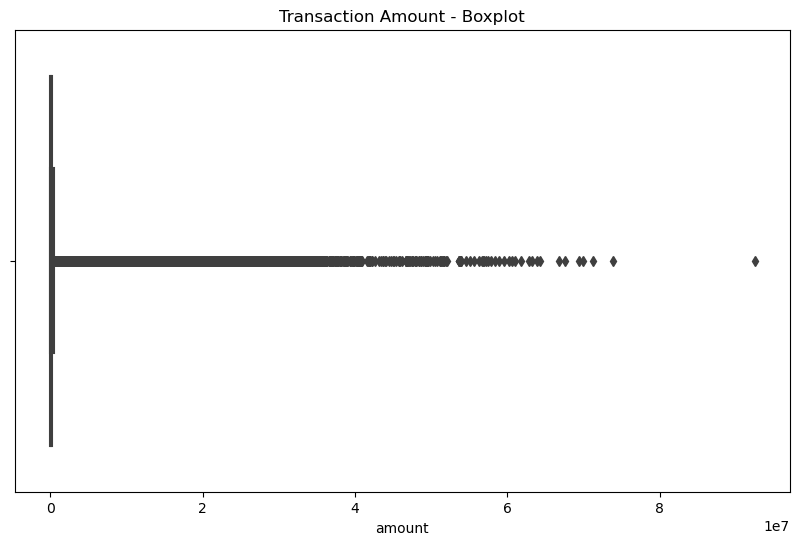

In [7]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['amount'])
plt.title('Transaction Amount - Boxplot')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

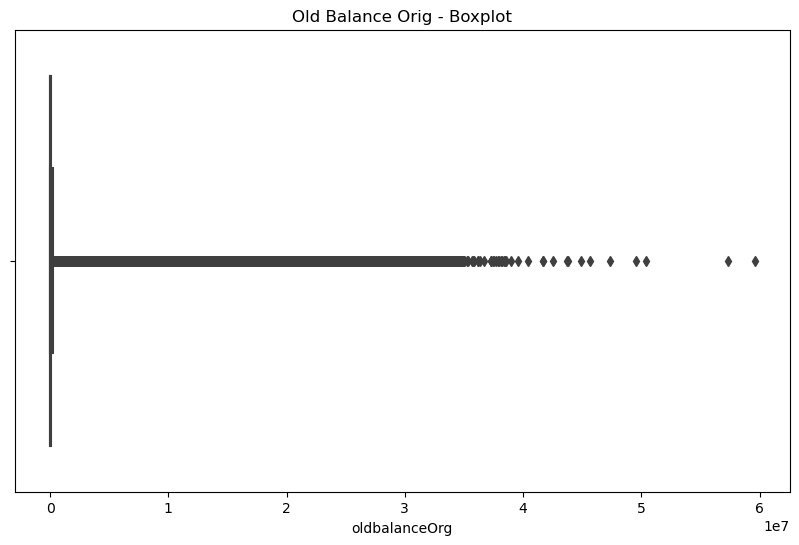

In [8]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['oldbalanceOrg'])
plt.title('Old Balance Orig - Boxplot')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

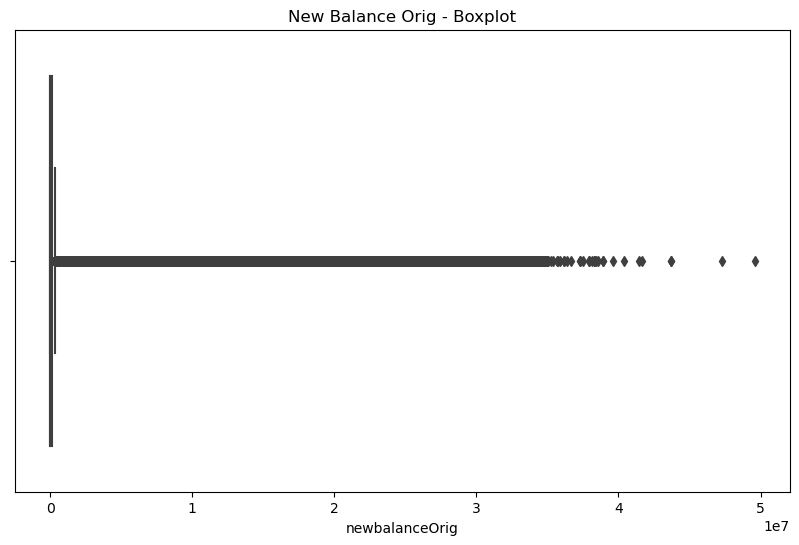

In [9]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['newbalanceOrig'])
plt.title('New Balance Orig - Boxplot')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

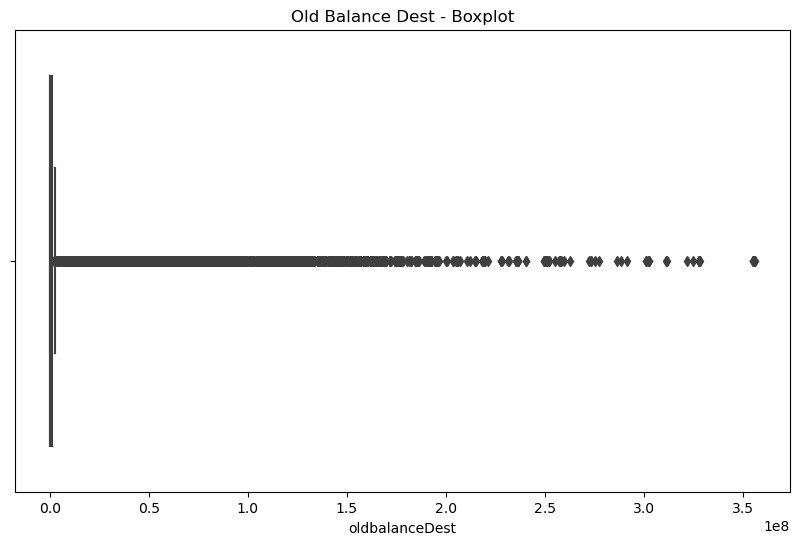

In [10]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['oldbalanceDest'])
plt.title('Old Balance Dest - Boxplot')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

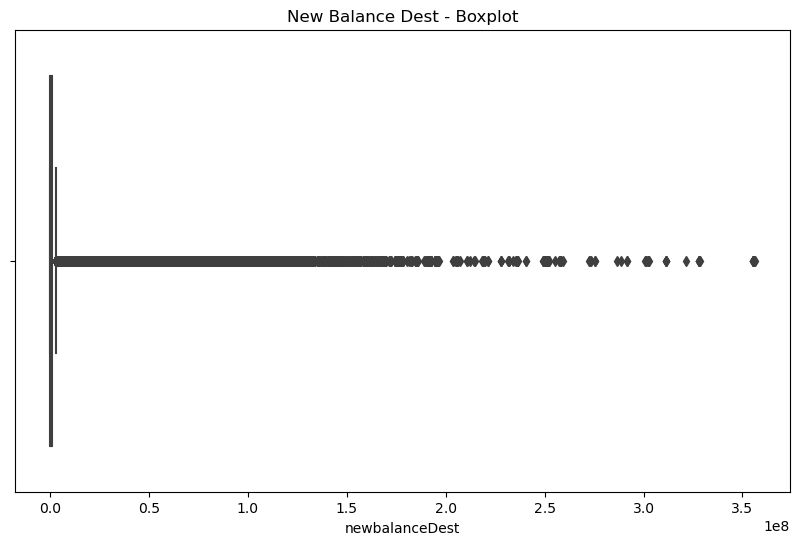

In [11]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['newbalanceDest'])
plt.title('New Balance Dest - Boxplot')
plt.show

C:\Users\Suchita\AppData\Local\Temp\ipykernel_9348\126802512.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


<Axes: >

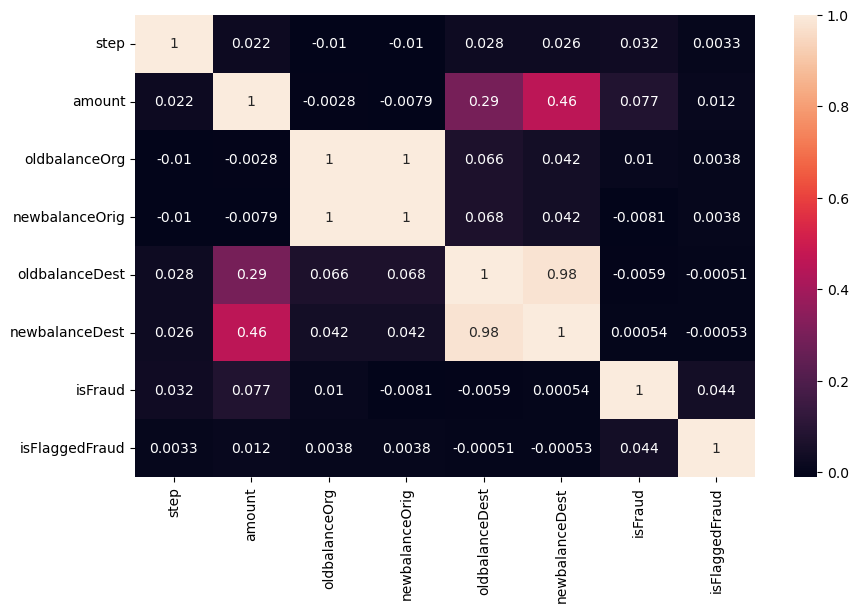

In [12]:
corr=df.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True)

In [16]:
# Define thresholds to filter high-value transactions
# Calculate 99th percentile thresholds
amount_threshold = df['amount'].quantile(0.99)
oldbalanceOrg_threshold = df['oldbalanceOrg'].quantile(0.99)
newbalanceOrig_threshold = df['newbalanceOrig'].quantile(0.99)
oldbalanceDest_threshold = df['oldbalanceDest'].quantile(0.99)
newbalanceDest_threshold = df['newbalanceDest'].quantile(0.99)

# Filter high-value transactions based on all thresholds
high_value_transactions = df[(df['amount'] > amount_threshold) | 
                             (df['oldbalanceOrg'] > oldbalanceOrg_threshold) | 
                             (df['newbalanceOrig'] > newbalanceOrig_threshold) |
                             (df['oldbalanceDest'] > oldbalanceDest_threshold) |
                             (df['newbalanceDest'] > newbalanceDest_threshold)]


# Check the distribution of 'isFraud' in these high-value transactions
fraud_distribution = high_value_transactions['isFraud'].value_counts(normalize=True) * 100

# Display the result
print("Distribution of Fraudulent Transactions in High-Value Data:")
print(fraud_distribution)


Distribution of Fraudulent Transactions in High-Value Data:
0    98.912884
1     1.087116
Name: isFraud, dtype: float64


In [17]:
import numpy as np

# Apply log transformation to reduce skewness in high-value features
df['log_amount'] = df['amount'].apply(lambda x: np.log1p(x))
df['log_oldbalanceOrg'] = df['oldbalanceOrg'].apply(lambda x: np.log1p(x))
df['log_newbalanceOrig'] = df['newbalanceOrig'].apply(lambda x: np.log1p(x))
df['log_oldbalanceDest'] = df['oldbalanceDest'].apply(lambda x: np.log1p(x))
df['log_newbalanceDest'] = df['newbalanceDest'].apply(lambda x: np.log1p(x))

# Check the distribution of the transformed features
df[['log_amount', 'log_oldbalanceOrg', 'log_newbalanceOrig', 'log_oldbalanceDest', 'log_newbalanceDest']].describe()


,log_amount,log_oldbalanceOrg,log_newbalanceOrig,log_oldbalanceDest,log_newbalanceDest
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,1.084087e+01,7.414574e+00,5.366092e+00,7.722420e+00,8.330604e+00
std,1.814509e+00,5.669756e+00,6.330024e+00,6.747637e+00,6.675095e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,9.502306e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.122355e+01,9.561631e+00,0.000000e+00,1.179590e+01,1.227682e+01
75%,1.224876e+01,1.158353e+01,1.187937e+01,1.375686e+01,1.392159e+01
max,1.834213e+01,1.790292e+01,1.771920e+01,1.969049e+01,1.969094e+01


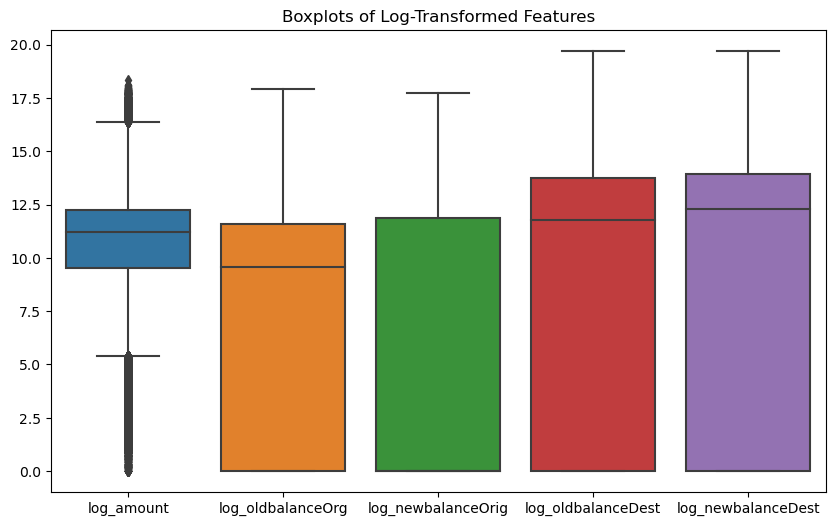

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['log_amount', 'log_oldbalanceOrg', 'log_newbalanceOrig', 'log_oldbalanceDest', 'log_newbalanceDest']])
plt.title('Boxplots of Log-Transformed Features')
plt.show()

# Model Development

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Define features and target variable
X = df[['log_amount', 'log_oldbalanceOrg', 'log_newbalanceOrig', 'log_oldbalanceDest', 'log_newbalanceDest']]
y = df['isFraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_model = RandomForestClassifier(class_weight='balanced',n_estimators=50, random_state=42)

In [31]:
# Train the model
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

In [32]:
# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("AUC-ROC Score:", roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1]))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.92      0.72      0.81      2435

    accuracy                           1.00   1908786
   macro avg       0.96      0.86      0.90   1908786
weighted avg       1.00      1.00      1.00   1908786

Confusion Matrix:
 [[1906202     149]
 [    682    1753]]
AUC-ROC Score: 0.9850273230805502


## AUC-ROC Score: 0.985, indicating that the model is very effective at distinguishing between the classes

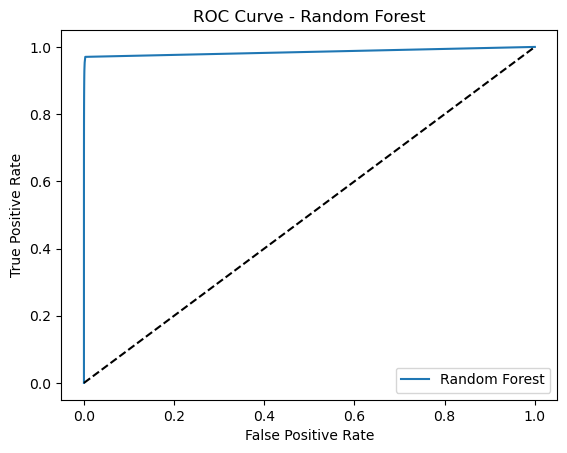

In [34]:
#Plot the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label='Random Forest')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend()
plt.show()

              Feature  Importance
1   log_oldbalanceOrg    0.456277
2  log_newbalanceOrig    0.255384
0          log_amount    0.221778
4  log_newbalanceDest    0.034987
3  log_oldbalanceDest    0.031574


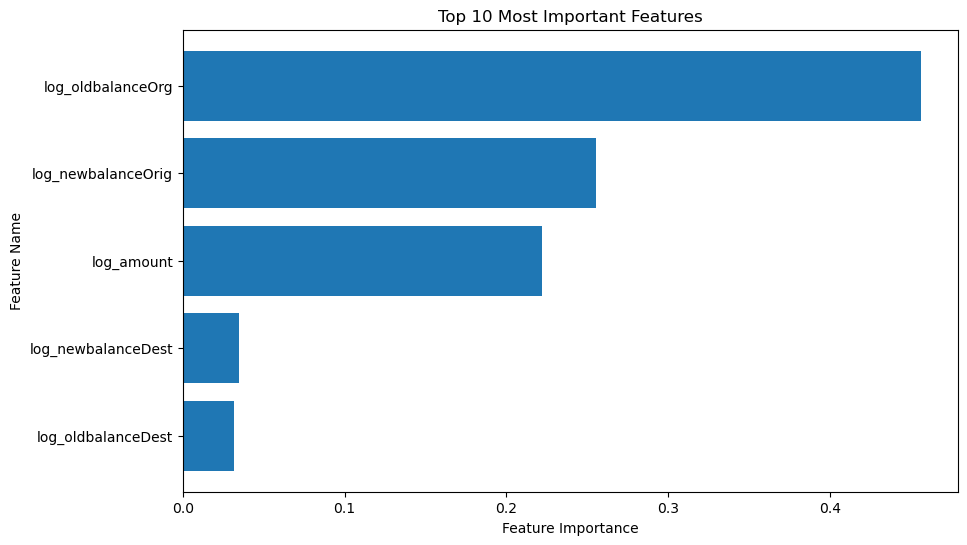

In [35]:
# Get feature importances from the Random Forest model
importances = rf_model.feature_importances_

# Get feature names
feature_names = X_train.columns

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the DataFrame by importance values
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the DataFrame
print(feature_importance_df)

# Plot the top 10 most important features
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'].head(10), feature_importance_df['Importance'].head(10))
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Top 10 Most Important Features')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()


In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

# Selecting only the most important features
X_selected = df[['log_oldbalanceOrg', 'log_newbalanceOrig', 'log_amount']]
y = df['isFraud']

# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Training the Random Forest model
rf_selected = RandomForestClassifier(random_state=42, n_estimators=100)
rf_selected.fit(X_train, y_train)

# Predicting on the test set
y_pred_selected = rf_selected.predict(X_test)
y_proba_selected = rf_selected.predict_proba(X_test)[:, 1]

# Evaluation Metrics
print("Classification Report:\n", classification_report(y_test, y_pred_selected))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_selected))
print("AUC-ROC Score:", roc_auc_score(y_test, y_proba_selected))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.92      0.96      0.94      1620

    accuracy                           1.00   1272524
   macro avg       0.96      0.98      0.97   1272524
weighted avg       1.00      1.00      1.00   1272524

Confusion Matrix:
 [[1270763     141]
 [     60    1560]]
AUC-ROC Score: 0.9937879116744973


In [38]:
import numpy as np
from sklearn.metrics import precision_recall_curve, roc_curve, confusion_matrix, classification_report, auc

# Get predicted probabilities for the positive class (fraud)
y_proba_selected = rf_selected.predict_proba(X_test)[:, 1]

# Evaluate precision-recall at various thresholds
precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba_selected)

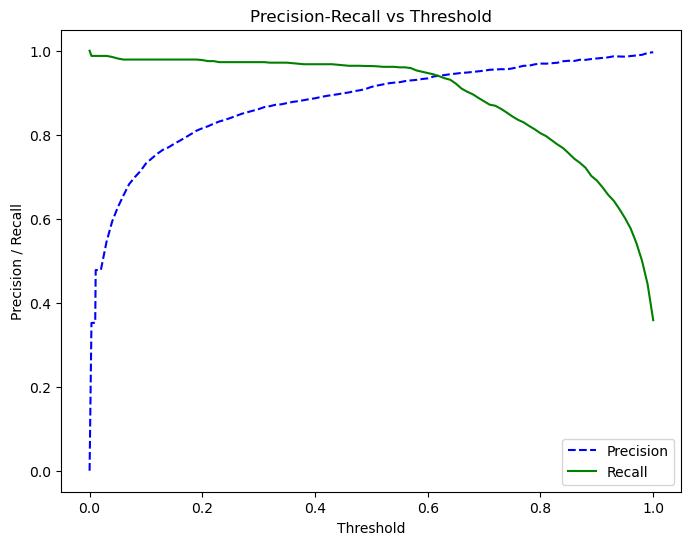

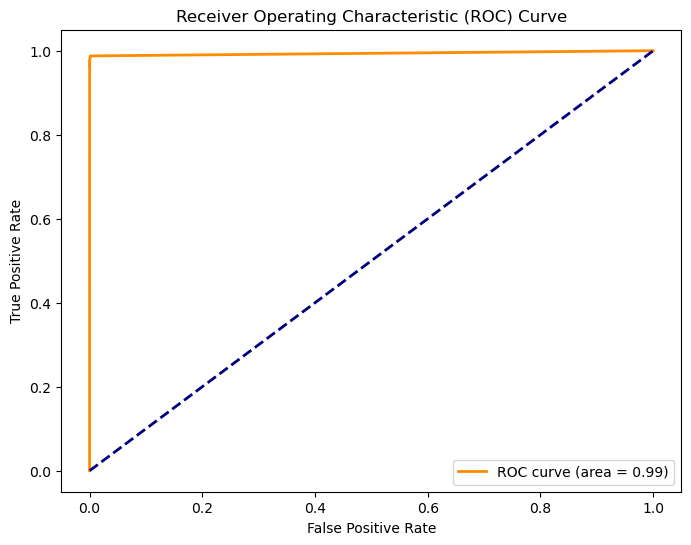

In [43]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_recall_curve, roc_curve, auc

# Get predicted probabilities for the positive class (fraud)
y_proba_selected = rf_selected.predict_proba(X_test)[:, 1]

# Precision-Recall curve
precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba_selected)

plt.figure(figsize=(8, 6))
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Precision / Recall")
plt.title("Precision-Recall vs Threshold")
plt.legend(loc="best")
plt.show()

# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba_selected)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# 1. Introduction

This report outlines the development of a fraud detection model for a financial services company. The goal of the project is to proactively identify fraudulent transactions using a machine learning approach, with a focus on handling an imbalanced dataset where fraudulent transactions represent a small fraction of the total.

### 2. Data Cleaning

The dataset consisted of over 6 million transactions with key variables such as transaction amounts and account balances. The following steps were taken during data cleaning:

Missing Values: No missing values were present in the dataset.
Outliers: Outliers, particularly in amount, oldbalanceOrg, and newbalanceOrig, were handled using log transformations to reduce skewness.

Multi-Collinearity: High correlations between balance-related features (oldbalanceOrg and newbalanceOrig) were identified and handled through feature selection and transformation.

### 3. Fraud Detection Model

We developed a Random Forest model for fraud detection, chosen for its ability to handle imbalanced datasets and its effectiveness in capturing non-linear relationships between features.

## Algorithm: Random Forest Classifier

Key Parameters:

n_estimators=100 (number of trees),

class_weight='balanced' (to address the class imbalance)

Features: Log-transformed features (log_amount, log_oldbalanceOrg, log_newbalanceOrig, log_oldbalanceDest, log_newbalanceDest) were used to improve model performance.

## 4. Variable Selection

The most important variables selected for the model were:

log_oldbalanceOrg: Balance before the transaction.

log_newbalanceOrig: Balance after the transaction.

log_amount: The transaction amount.

These variables were chosen based on their strong correlation with fraudulent behavior.

## 5. Model Performance

The model was evaluated using the following metrics:

Accuracy: 1.00

Precision (Fraud Class): 0.92

Recall (Fraud Class): 0.96

F1-Score (Fraud Class): 0.94

AUC-ROC Score: 0.994

We also visualized the model’s performance using:

ROC Curve: Demonstrating the model’s ability to balance false positives and true positives.

Precision-Recall Curve: Showcasing how precision and recall change with different thresholds.

## 6. Key Factors Predicting Fraud

The key factors predicting fraud include:

log_oldbalanceOrg: Accounts that experience significant reductions in balance before the transaction are more likely to be involved in fraud.

log_newbalanceOrig: Accounts left with very low balances post-transaction are often associated with fraud.

log_amount: Large transaction amounts, especially in combination with unusual balance changes, are predictive of fraud.

## 7. Do These Factors Make Sense?
Yes, these factors align with common fraud patterns. Fraudsters often deplete accounts through large, suspicious transactions that significantly alter the account balance, leaving it nearly empty.

## 8. Prevention Recommendations

To improve fraud detection, the following infrastructure updates should be considered:

Real-Time Transaction Monitoring: Implement automated alerts for transactions that involve large sums or significant balance changes.

Risk-Based Authentication: Require additional verification for high-value transactions or transactions that deplete accounts.

Transaction Limits: Set thresholds that flag unusually large transactions for manual review.

## 9. Monitoring Success of Fraud Prevention
To determine the effectiveness of these actions, the company should:

Measure Fraud Detection Rate: Compare the number of detected fraudulent transactions before and after implementing the model.
Track False Positives: Monitor the rate of legitimate transactions being flagged as fraudulent and adjust the model as necessary.

Customer Feedback: Use customer feedback on blocked transactions to adjust and improve the fraud detection system.

Continuous Monitoring and Retraining: Regularly update the model with new data and retrain it to keep up with evolving fraud patterns.

# Conclusion

The Random Forest model for fraud detection has demonstrated strong performance in identifying fraudulent transactions, thanks to its focus on key features like transaction amount and balance changes. By integrating this model into the company’s infrastructure, real-time fraud prevention can be achieved, significantly reducing the risk of financial losses